# 密度聚类方法

---

### 实验介绍

密度聚类通过评估样本的紧密程度来划分对应的类别，理论上可以找出任何形状的聚类并有效避免噪声的干扰。除此之外，密度聚类和层次聚类一样，也无需像划分聚类那样提前声明需要聚集的类别数量。

### 实验知识点

- 密度聚类概述
- DBSCAN 算法原理
- DBSCAN 算法实现
- HDBSCAN 算法原理
- HDBSCAN 算法应用

### 实验目录

- <a href="#密度聚类方法概述">密度聚类方法概述</a>
- <a href="#DBSCAN-密度聚类算法">DBSCAN 密度聚类算法</a>
- <a href="#HDBSCAN-聚类算法">HDBSCAN 聚类算法</a>
- <a href="#实验总结">实验总结</a>

## 密度聚类方法概述

上节课的内容中，我们学习了层次聚类方法，并介绍了其中的自底向上，自顶向下以及更加高效的 BIRCH 层次聚类算法。层次聚类有效地避免了在划分聚类中需要提前指定聚类类别数量的麻烦，并通过生成层次结构的树方便我们按需获取不同的聚类结果。

但是，层次聚类有一些先天性的缺点无法避免，例如它和划分聚类方法一样，无法很好地接近非凸（non-convex）数据的聚类问题，这一点在下面详细说。于是，后来就有人提出了密度聚类方法。

密度聚类通过评估样本的紧密程度来划分对应的类别，理论上可以找出任何形状的聚类，包括非凸（non-convex）数据。除此之外，密度聚类同样不需要事先知道要形成的簇类的数量，还能有效识别噪声点。所以密度聚类同样也是一类十分常用的聚类算法。

## DBSCAN 密度聚类算法

密度聚类算法中最为常用的就属 DBSCAN 算法了，DBSCAN 是英文 Density-based spatial clustering of applications with noise 的缩写，直译过来就是「具有噪声的基于密度的聚类方法」。这种方法是由 Martin Ester 等在 1996 年提出。

相比其他的聚类方法，DBSCAN 的显著优点是可以在有噪音的数据中发现形状与大小各异的类别。另外，相比于划分聚类方法，DBSCAN 不需要预先声明聚类数量，这一点和层次聚类非常相似。

### DBSCAN 聚类原理

DBSCAN 作为一种典型的密度聚类方法，它的聚类原理当然是和密度有关。简单来讲，DBSCAN 一般假定样本的类别可以通过样本分布的紧密程度决定，于是先发现密度较高的点，然后把相近的高密度点逐步连成一片，进而找到不同的类别（簇）。

下面，我们通过示例来说一说 DBSCAN 具体的运作过程。

1. 首先，DBSCAN 会以每个数据点为圆心，以 $eps$（$ \varepsilon $-邻域） 为半径画圆。
2. 然后，DBSCAN 会计算相应圆中有多少个其他点，并以该数目作为圆心数据点的密度值。
3. 接下来，我们需要确定密度阈值 MinPts，并分别将小于或大于该密度阈值的数据点（包含自己）称作低密度或高密度点（核心点）。
4. 如果，此时有一个高密度的点在另一个高密度的点的圆圈范围内，我们就把这两个点串联起来。
5. 之后，如果有低密度的点也在高密度的点的圆圈范围内，也将其连接到最近的高密度点上，并称之为边界点。

最后，所有能连到一起的数据点就形成了一个聚类类别。而有一些无法被连接的点就定义为异常点。下面，我们根据一个图示来详细阐述该过程。


![image](https://doc.shiyanlou.com/document-uid214893labid6102timestamp1531806243633.png)

如上图所示，假设我们指定密度阈值 `MinPts = 4`，那么图中的红色点就是核心点，因为它们的 $ \varepsilon $-邻域里包含最少 `4` 个点（包括自己），由于它们之间相互可达，它们形成了一个聚类。图中蓝色的点不是核心点，但它们在核心点的圆圈内，所以也属于同一个聚类，也就是边界点。而紫色点既不是核心点，又不是边界点，即被称之为异常点。

上面就是 DBSCAN 聚类的整个过程，看起来还是非常简单和清楚吧！

### DBSCAN 相关定义

为了帮助你更加准确地掌握 DBSCAN 相关知识，接下来，我们整理一下 DBSCAN 算法中涉及到的相关定义，并使用数学语言规范描述。

首先，我们假设样本集是 $D=(x_1,x_2,\cdots,x_m)$，则 DBSCAN 中相关的定义描述如下：

**$ \varepsilon $-邻域：**

对于 $x_j \in D$，其$ \varepsilon $-邻域包含样本集 $D$ 中与 $x_j$ 的距离不大于 $ \varepsilon $ 的子样本集，即 $N_{\epsilon}(x_j) = \{x_i \in D| distance(x_i, x_j) \leq \epsilon\}$, 这个子样本集的个数记为 $|N_{\epsilon}(x_j)|$。

**核心对象（核心点）：**

对于任一样本 $x_j \in D$，如果其 $ \varepsilon $-邻域对应的 $N_{\epsilon}(x_j)$ 至少包含 $MinPts$ 个样本，即如果 $|N_{\epsilon}(x_j)| \geq MinPts$，则 $x_j$ 是核心对象。

**密度直达：**

如果 $x_i$ 位于 $x_j$ 的 $ \varepsilon $-邻域中，且 $x_j$ 是核心对象，则称 $x_i$ 由 $x_j$ 密度直达。注意反之不一定成立，即此时不能说 $x_j$ 由 $x_i$ 密度直达, 除非 $x_i$ 也是核心对象。

**密度可达：**

对于 $x_i$ 和 $x_j$，如果存在样本序列 $p_1, p_2,\cdots,p_t$，满足 $p_1=x_i$,$p_t=x_j$, 且$p_{k+1}$ 由 $p_k$（其中 $k = 1, 2, \cdots, t-1$）密度直达，则称$x_j$ 由 $x_i$ 密度可达。也就是说，密度可达满足传递性。此时序列中的传递样本 $p_1, p_2,\cdots,p_{t-1}$ 均为核心对象，因为只有核心对象才能使其他样本密度直达。

**密度相连：**

对于 $x_i$ 和 $x_j$，如果存在核心对象样本 $x_k$，使 $x_i$ 和 $x_j$ 均由 $x_k$ 密度可达，则称 $x_i$ 和 $x_j$ 密度相连。注意密度相连关系是满足对称性的。

对于这 5 个定义，重点理解前 3 个即可。

另外，关于确定某样本是否在核心样本的 $ \varepsilon $-邻域内，其实也就是二者之间距离度量的问题，我们一般可以使用欧式距离计算。其实你会发现，这里$ \varepsilon $-邻域确定了一个圆，而这就类似于 K-近邻算法中找最近邻的 K 个点的情形。

### DBSCAN 聚类算法 Python 实现

实现 DBSCAN 聚类过程前，我们同样需要先生成一组示例数据。这一次，我们不生成团状数据，而是月牙状数据块。这里用到了 `make_moons` 方法。

In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
noisy_moons, _ = datasets.make_moons(n_samples=100, noise=.05, random_state=10) # 生成 100 个样本并添加噪声
noisy_moons[:5]

array([[ 0.2554364 ,  0.90420806],
       [ 0.55299636,  0.84445141],
       [-0.90343862,  0.39161309],
       [-0.62792219,  0.62502915],
       [ 0.60777269, -0.33777687]])

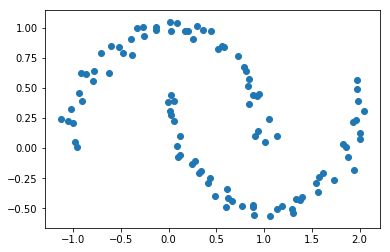

In [3]:
plt.scatter(noisy_moons[:,0], noisy_moons[:,1])

从上图可以看出，虽然数据点的分布比较奇怪，但肉眼观察明显呈现出 2 类。类似于下图：

![image](https://doc.shiyanlou.com/document-uid214893labid6102timestamp1531806243897.png)

此时，我们尝试使用划分聚类中的 K-Means 和层次聚类中的 BIRCH 方法来尝试对上面的数据集进行聚类。我们都知道，这两种方法是划分和层次聚类法中的代表，这里为了方便直接使用 scikit-learn 实现。

Text(0.5, 0, 'BIRCH')

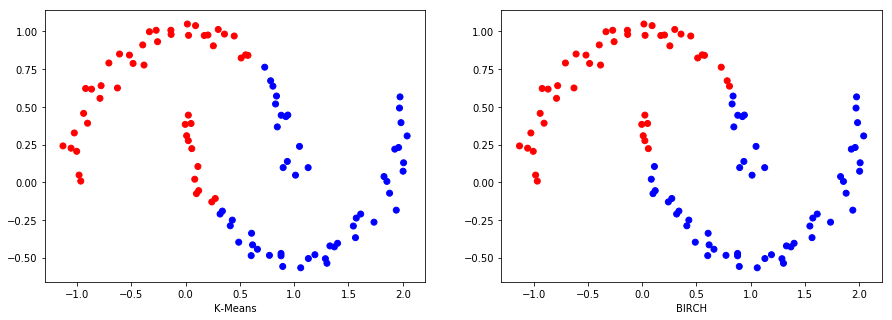

In [4]:
from sklearn.cluster import KMeans, Birch

kmeans_c = KMeans(n_clusters=2).fit_predict(noisy_moons)
birch_c = Birch(n_clusters=2).fit_predict(noisy_moons)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(noisy_moons[:,0], noisy_moons[:,1], c=kmeans_c, cmap='bwr')
axes[1].scatter(noisy_moons[:,0], noisy_moons[:,1], c=birch_c, cmap='bwr')
axes[0].set_xlabel('K-Means')
axes[1].set_xlabel('BIRCH')

上面的结果是不是让你大失所望，在前面实验中表现很好的 K-Means 和 BIRCH 方法竟然无法对上面的示例数据正确聚类。其实，面对这种凹状数据集，划分和层次聚类法往往都无法正确聚类，此时就需要密度聚类方法登场了。

下面，我们就尝试使用 Python 实现 DBSCAN 密度聚类算法，不知道你是否还记得 DBSCAN 聚类的原理，有些模糊就返回前一小节再复习一遍。因为算法的实现过程，其实就是 DBSCAN 聚类的流程。

首先，我们实现一个 `search_neighbors()` 函数，这个函数的目的是找出核心点周围可到达的数据点。其中，计算距离的方式使用欧式距离。

In [5]:
"""欧式距离
"""
def euclidean_distance(a, b):
    """
    参数:
    a -- 数组 a
    b -- 数组 b
    
    返回:
    dist -- a, b 间欧式距离
    """
    x = float(a[0]) - float(b[0])
    x = x * x
    y = float(a[1]) - float(b[1])
    y = y * y
    dist = round(np.sqrt(x + y), 2)
    return dist

In [6]:
"""找出数据集中距核心点 P 在 eps 范围内的邻近点
"""
def search_neighbors(D, P, eps):
    """
    参数:
    D -- 数据集（二维数组）
    P -- 核心点
    eps -- eps 邻域
    
    返回:
    neighbors -- 核心点在 eps 范围内的邻居
    """
    neighbors = []
    for Pn in range(0, len(D)):
        # 距离判断是否在 eps 范围内
        if euclidean_distance(D[P], D[Pn]) < eps:
            neighbors.append(Pn)
            
    return neighbors

接下来，我们实现 DBSCAN 的主体代码：

In [7]:
"""DBSCAN 密度聚类算法
"""
def dbscan_cluster(D, eps, MinPts):
    """
    参数:
    D -- 数据集（二维数组）
    eps -- eps 邻域
    MinPts -- 密度阀值

    返回:
    labels -- 聚类标签
    """
    labels = [0]*len(D)  # 初始化数据集中的数据类别全部为 0
    C = 0
    # 选择 P 作为核心点
    for P in range(0, len(D)):

        # 选择类别为 0 的点作为中心
        if not (labels[P] == 0):
            continue

        # 搜寻该数据点在 eps 圆中的邻居
        Neighbors = search_neighbors(D, P, eps)

        # 标记噪声点为 -1
        if len(Neighbors) < MinPts:
            labels[P] = -1

        # 非噪声点作为新类别中心
        else:
            C += 1  # 原类别 +1 作为新类别的标签
            labels[P] = C  # 将非噪声点设定为新类别

            # 开始检查 P 在 eps 圆中邻居的可达性
            for i, n in enumerate(Neighbors):
                Pn = Neighbors[i]  # 从 P 的邻居中取 1 个点

                # P 的邻居，设定为一样的类别
                if labels[Pn] == 0:
                    labels[Pn] = C

                    # 进一步搜索 P 的邻居的邻居
                    PnNeighbors = search_neighbors(D, Pn, eps)
                    if len(PnNeighbors) >= MinPts:  # 如果满足密度阈值要求则连通
                        Neighbors += PnNeighbors

                # 如果该点曾被标记为噪声点, 则重新连接到类别中
                elif labels[Pn] == -1:
                    labels[Pn] = C

    return labels

现在，我们使用 DBSCAN 算法对上面的月牙形示例数据进行聚类，得到聚类标签。这里，我们设定  εε -邻域的值为 0.5，而密度阈值 MinPts=5，即半径为 0.5 的圆内至少有 5 个其他点才能被看作是核心点。

In [8]:
dbscan_c = dbscan_cluster(noisy_moons, eps=0.5, MinPts=5)
np.array(dbscan_c) # 显示聚类标签

array([1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1])

依照 DBSCAN 算法得到的聚类标签，重新对散点图进行着色，查看聚类效果。

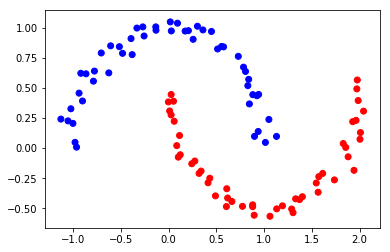

In [9]:
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c=dbscan_c, cmap='bwr')

如上图所示，DBSCAN 聚类结果符合我们的心理预期，同时弥补了划分和层次聚类的不足。

### DBSCAN 聚类算法 scikit-learn 实现

我们已经使用 Python 对 DBSCAN 聚类算法进行了实现，事实上 scikit-learn 同样提供了 DBSCAN 聚类相关的 API，我们一起看一看如何使用：

```python
sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=1)
```

其中，主要参数有：
- `eps`: 即 $ \varepsilon $-邻域的值。
- `min_samples`: 即密度阈值 MinPts 的值。
- `metric`: 距离度量方式，默认为欧式距离。 
- `algorithm`：近邻算法求解方式：`auto`, `ball_tree`, `kd_tree`, `brute` 可选。

同时，对示例数据完成聚类。

In [10]:
from sklearn.cluster import DBSCAN

dbscan_sk = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moons)
dbscan_sk_c

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

依照得到的聚类标签，重新对散点图进行着色，查看聚类效果。

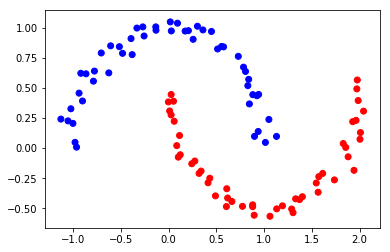

In [11]:
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c=dbscan_sk_c, cmap='bwr')

可以看到，上图和我们使用 Python 手动实现的算法计算结果一模一样。

最后，我们再集中对比一下 DBSCAN 和 K-Means 两种方法。


<img width='800px' src="https://upload-images.jianshu.io/upload_images/15406304-505be7a504398315.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240"></img>

## HDBSCAN 聚类算法

HDBSCAN 聚类算法由 [Campello, Moulavi, and Sander](http://link.springer.com/chapter/10.1007%2F978-3-642-37456-2_14) 三人于 2013 年提出，这是一种比较新的聚类方法，该方法的英文全称为：Density-Based Clustering Based on Hierarchical Density Estimates。如果你足够仔细，你会发现 HDBSCAN 相对于 DBSCAN 算法多出来的 H 其实是 Hierarchical，而这正好是层次聚类法的英文单词。

而 HDBSCAN 直译成中文的意思就是：基于层次密度估计的密度聚类方法。

在讨论 HDBSCAN 之前，我们先说一下 DBSCAN 算法的一个很大的缺点，那就是参数敏感性。

DBSCAN 受参数变化的影响较大，特别是数据分布密度不均匀时，如果我们把 eps 设置为较小值，那么密度本身较小的类别会被进一步划分为多个子类。同理，当设置 eps 值较大时，会使得距离较近且密度较大类别被合并成一个簇。这也就体现了 DBSCAN 的不稳定性。

HDBSCAN 通过结合层次聚类的特点来改善 DBSCAN 的不稳定性，故聚类过程变更为 2 个步骤：

1. **生成原始聚簇。** 此阶段和 DBSCAN 算法的第一阶段相似，确定核心点，生成原始聚簇并有效地识别噪声点。
2. **合并原始聚簇。** 在此阶段使用层次聚类的思想对原始聚簇进行合并，降低了聚类结果对输入参数的敏感性。由于该方法不需要对每个对象进行测试和判断，同时也降低了时间复杂度。

### DBSCAN 与 HDBSCAN 聚类对比

接下来，我们就看一看 HDBSCAN 具体是怎样做的，及相对于 DBSCAN 的优势在哪里？

首先，我们重新生成一组示例数据：

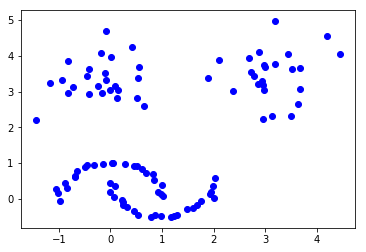

In [12]:
moons, _ = datasets.make_moons(n_samples=50, noise=0.05, random_state=10)
blobs, _ = datasets.make_blobs(n_samples=50, centers=[(-0.25,3.25), (3, 3.5)], cluster_std=0.6, random_state=10)

noisy_moons_blobs = np.vstack([moons, blobs])
plt.scatter(noisy_moons_blobs[:,0], noisy_moons_blobs[:,1], color='b')

如上图所示，该数据集包含有 2 个团状数据，一组月牙形数据。首先，我们使用 DBSCAN 算法对其进行聚类，看一看是什么情况：

In [13]:
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moons_blobs)
dbscan_sk_c

array([ 0,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,
        1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  1, -1,
        2, -1,  2,  2, -1,  3,  3,  3,  2,  3, -1,  3,  2,  3,  2, -1,  2,
        2, -1,  2,  3,  3,  2, -1, -1,  3, -1,  3,  2, -1,  3, -1,  3,  2,
        3,  3, -1,  2, -1, -1,  2,  3,  3, -1, -1, -1,  3,  3,  3])

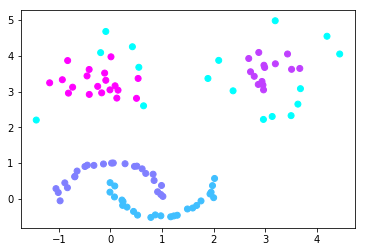

In [14]:
plt.scatter(noisy_moons_blobs[:,0], noisy_moons_blobs[:,1], c=dbscan_sk_c, cmap='cool')

通过观察，DBSCAN 算法将 noisy_moons_blobs 数据集聚为了 4 类，并标记出了团状数据周围的异常点。

事实上，通过肉眼观察，noisy_moons_blobs 数据集其实最佳聚类应该是 3 类。虽然我们上面的月牙形数据被划为 2 类，但这里明显将月牙形数据作为一类并与团状数据区分较好，也就是如下图所示。

那么，使用 DBSCAN 算法能做到吗？我们可以尝试一下，通过调大 eps 参数：

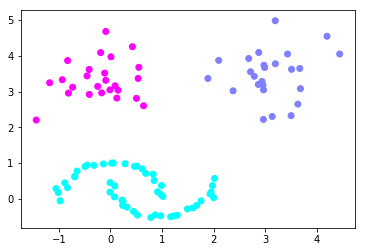

In [15]:
dbscan_sk = DBSCAN(eps=1, min_samples=5, metric='euclidean')
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moons_blobs)
plt.scatter(noisy_moons_blobs[:,0], noisy_moons_blobs[:,1], c=dbscan_sk_c, cmap='cool')

通过将 eps 参数从 0.5 增大到 1，我们成功将数据集聚为了 3 类，且噪声点消失。当然，对于本文这样一个小数据集，或许通过一次调参数就能够完成。但面对真实复杂的数据集，往往可能需要不断地调节 eps 和 min_samples 参数。工作量不仅很大，且可能得不到想要的聚类效果。

**接下来，我们尝试通过 HDBSCAN 一次性解决这个问题。**

当前，scikit-learn 中还没有包含 HDBSCAN 算法，不过 scikit-learn-contrib 分支已经有完整的 HDBSCAN 算法实现。这里，我们先要通过下面的命令安装 HDBSCAN，直接运行即可。

In [16]:
# 运行安装 hdbscan 模块
!pip install hdbscan==0.8.13

    100% |████████████████████████████████| 696kB 108kB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.
tensorflow 1.12.0 has requirement protobuf>=3.6.1, but you'll have protobuf 3.6.0 which is incompatible.


安装并载入模块之后，需要指定参数。HDBSCAN 中最主要的参数是 min_cluster_size，它用来决定形成一个类别最小的样本数量。第二个重要参数是 min_samples，简单来讲，min_samples 值越大表示聚类效果越保守，也就是更多的点将会被声明为噪声。

下面，我们直接使用 HDBSCAN 默认参数（min_cluster_size=5, min_samples=None）完成对 noisy_moons_blobs 数据集的聚类过程。

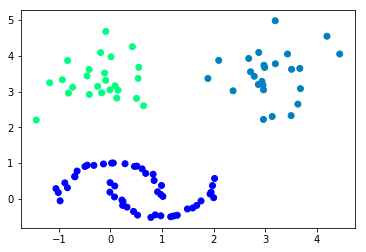

In [17]:
import hdbscan

hdbscan_m = hdbscan.HDBSCAN(gen_min_span_tree=True) # gen_min_span_tree 参数为下文绘图做准备
hdbscan_m_c = hdbscan_m.fit_predict(noisy_moons_blobs)

plt.scatter(noisy_moons_blobs[:,0], noisy_moons_blobs[:,1], c=hdbscan_m_c, cmap='winter')

可以看到，HDBSCAN 中是没有 eps 和 MinPts 参数，只需要简单指定形成簇的最小样本数量调节即可完成聚类，且聚类效果非常好。

### HDBSCAN 算法流程

下面，我们解析一下 HDBSCAN 算法的聚类流程，由于涉及到图论的知识，本部分为选学内容，根据自身情况理解。

首先，我们需要明确几个定义。

**核心距离 $core_k(x)$**: 当前点到其第 k 近的点直接的距离，一般用欧式距离。

$$
core_k(x) = d(x,N^{\mathcal{k}}(x))
$$

<img width='700px' src="https://upload-images.jianshu.io/upload_images/15406304-d666c9c8a82a2f45.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240"></img>

**互达距离 $d_{\mathrm{mreach-}k}(a,b)$**: 从核心点到相邻核心点直接的距离，一般用欧式距离。

$$
d_{\mathrm{mreach-}k}(a,b) = \max \{\mathrm{core}_k(a), \mathrm{core}_k(b), d(a,b) \}
$$

<img width='700px' src="https://doc.shiyanlou.com/document-uid214893labid6102timestamp1531806244835.png"></img>

现在，我们有了一个新的对数据之间相互可达性度量标准，然后开始在稠密数据上找到噪声点。当然，密集地区是相对的，不同的聚类可能具有不同的密度。从概念上讲，我们要做的是：对数据绘制出加权图，数据点为顶点，任意两点之间的边对应的权重等于两点之间的互达距离。

于是，可以假设有一个阈值 $ \varepsilon $，权重大于 $ \varepsilon $ 的边被删除掉，随着阈值由大到小的变化，整个图的连通性会发生变化。每一个连通区域看做一个簇的话，就可以得到一个随 $ \varepsilon $ 变化的层次聚类结果。

最简单的实现方式就是每设置一个阈值，就对图进行一次连通性判断并更新，不过实践证明这样执行的效率太低。幸运的是，图论提供了一种手段，叫图的最小生成树。

生成树的定义为：对于一个有 $n$ 个点的数据图，最少需要 $n−1$ 条边使得这 $n$ 个点连通，由这 $n−1$ 条边组成的子图则称为原图的生成树。

![image](https://doc.shiyanlou.com/document-uid214893labid6102timestamp1531806245069.png)

而当图中的边具有权值时，总会有一个生成树的边的权值之和小于或者等于其它生成树的边的权值之和，这就是最小生成子树 [上图粗实线]。

一般情况下，我们可以通过 [Prim 算法](https://en.wikipedia.org/wiki/Prim%27s_algorithm) 非常高效地构建最小生成树。当然，更理想的是使用 Boruvka 算法来查找最小生成树。下图是 Boruvka 算法查找最小生成树的动画，关于算法的细节就不展开了。

<img width='600px' src="https://upload-images.jianshu.io/upload_images/15406304-964a42be40461884.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240"></img>

下面，我们通过 hdbscan 提供的 `minimum_spanning_tree_.plot()` 方法绘制出 HDBSCAN 算法针对 `noisy_moons_blobs` 数据集聚类时的最小生成子树。

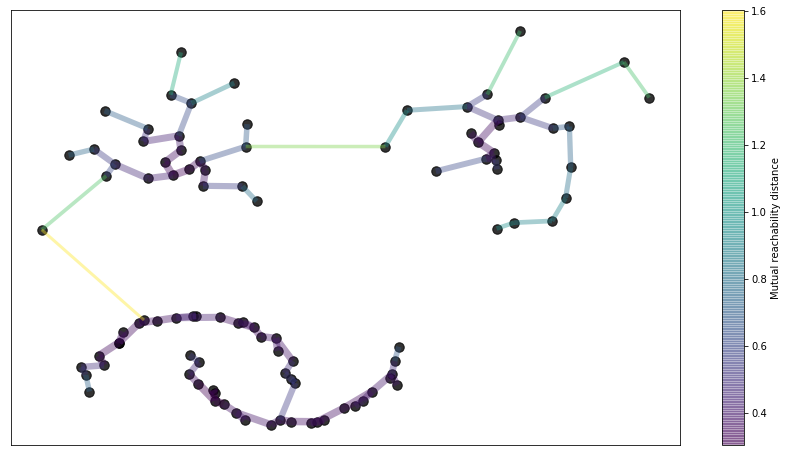

In [18]:
plt.figure(figsize=(15,8))
hdbscan_m.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.4, 
                                      node_size=90, 
                                      edge_linewidth=3)

上图为 `noisy_moons_blobs` 数据集的最小生成树，颜色对应着点与点之间的互达距离（权重）。

当我们有了最小生成树之后，就可以构建集群层次了。这个过程非常简单，就是前面层次聚类中学习到的自底而上的层次聚类过程。同样，我们可以使用 hdbscan 提供的 `single_linkage_tree_.plot()` 方法直接输出最终的层次二叉树。

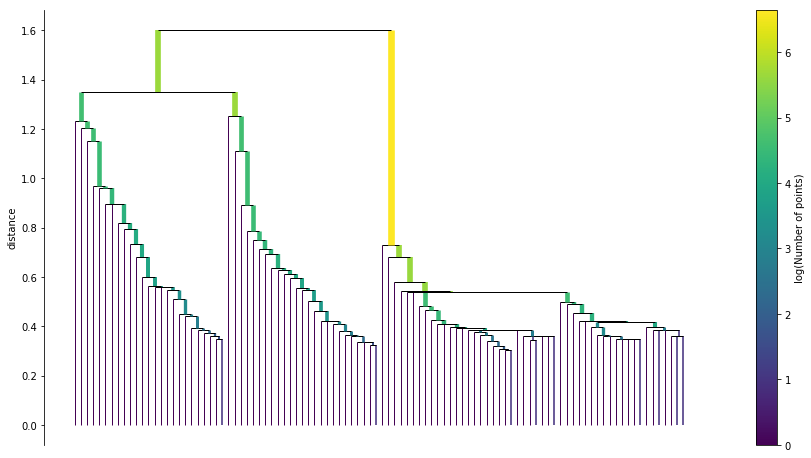

In [19]:
plt.figure(figsize=(15,8))
hdbscan_m.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

图中，竖线的长度对应着距离，而颜色对应着簇密度。

接下来，我们可以通过压缩二叉树提取最终聚类的簇。这里又需要涉及到一个新的概念，簇的 $\lambda$ 指标：

$$
\lambda = \frac{1}{\mathrm{distance}}
$$

此时，我们可以通过 hdbscan 提供的 `condensed_tree_.plot()` 方法绘制出压缩后的层次二叉树。

plt.figure(figsize=(15,8))
hdbscan_m.condensed_tree_.plot()

纵轴由互达距离变为 $\lambda$ 指标。

其实，当每个点进行分裂时，一般有两种情况：当前团簇分裂为两个子团簇，或者是当前团簇分裂为一个大的团簇和几个离散点。于是：

- $\lambda_{\mathrm{birth}}$ 指簇形成时的 $\lambda$ 值 
- $\lambda_{\mathrm{death}}$ 指簇分裂为两个子簇时的 $\lambda$ 值 
- $\lambda_{\mathrm{p}}$ 指点 $p$ 从簇中分离出去时的 $\lambda$ 值

我们希望簇在分裂时的稳定性越强越好，于是可以定义一个指标来衡量簇的稳定性：

$$
\sum_{p \in \mathrm{cluster}} (\lambda_p - \lambda_{\mathrm{birth}})
$$

所以，当簇的分裂过程中，如果分裂而成的两个子簇的稳定性之和大于该团簇，那么我们就支持这次分裂，反之我们清除这次分裂。这样就可以由叶节点自底而上的遍历到根节点，从而选出所需的簇。

同样，我们可以使用 hdbscan 提供的 `condensed_tree_.plot(select_clusters=True)` 方法来选择符合稳定特征的簇。

plt.figure(figsize=(15,8))
hdbscan_m.condensed_tree_.plot(select_clusters=True)

如上图所示，红圈圈定出来的就是最终符合要求的稳定聚类簇了。以上，就是 HDBSCAN 聚类的原理过程。

## 实验总结

本次实验中，我们重点了解了 DBSCAN 密度聚类方法相较于层次和划分聚类方法的优势，并学习了其原理及 Python 实现过程。除此之外，还了解了比较前沿的 HDBSCAN 密度聚类方法，并讲解了其聚类原理过程。我们建议你重点掌握 DBSCAN 算法的原理及实现，并学会使用 HDBSCAN 算法即可，由于 HDBSCAN 理论涉及部分图论知识，不要求每个人都掌握。

回顾本文的一些知识点：

- 密度聚类概述
- DBSCAN 算法原理
- DBSCAN 算法实现
- HDBSCAN 算法原理
- HDBSCAN 算法应用

**密度聚类：**

- [DBSCAN - 维基百科](https://zh.wikipedia.org/zh/DBSCAN)